In [4]:
import pandas as pd

# ✅ Load your uploaded CSV
df = pd.read_csv('/WOMENS_2025_TEAM.csv')

# ✅ Show the first few rows to verify it loaded correctly
df.head()


,#,Player,GP-GS,G,A,PTS,SH,SH%,SOG,SOG%,GWG,FPG,FPS,GB,TO,CT,DC,FOULS,RC-YC-GC
0,44.0,"Ward, Emma",19-19,30,46,76,77,0.390,55,0.714,1,3,9,6,41,2,0,9,0-1-0
1,24.0,"Trinkaus, Caroline",19-18,32,11,43,72,0.444,57,0.792,4,9,11,6,16,5,8,6,0-3-7
2,5.0,"Muchnick, Emma",19-18,34,7,41,71,0.479,55,0.775,2,12,24,27,31,9,13,8,0-1-1
3,19.0,"Britton, Gracie",19-14,20,10,30,41,0.488,33,0.805,0,3,7,8,16,0,1,2,0-0-1
4,11.0,"Vogelman, Alexa",19-10,21,6,27,46,0.457,35,0.761,0,9,14,25,27,13,31,26,0-3-0


# New Section

### Dataset Description

This project uses the official 2025 season statistics for the **Syracuse University Women’s Lacrosse team**.  
The dataset includes **individual-level performance metrics** such as:

- `G`, `A`, `PTS`: Goals, Assists, and Total Points
- `SH`, `SH%`: Total shots and shooting percentage
- `SOG`, `SOG%`: Shots on goal and shot accuracy
- `TO`, `CT`: Turnovers and caused turnovers
- `GB`, `DC`: Ground balls and draw controls
- `FOULS`, `RC-YC-GC`: Fouls and cards
- `GP-GS`: Games Played and Games Started

These stats allow us to evaluate individual and team performance across offensive and defensive contributions.


In [5]:
# ✅ Filter rows where GP-GS is like "number-number"
df = df[df['GP-GS'].str.match(r'^\d+-\d+$')]

# ✅ Extract GP and GS
df[['GP', 'GS']] = df['GP-GS'].str.split('-', expand=True).astype(int)

# ✅ Convert key columns to numeric (handle SH%, SOG%, etc.)
numeric_cols = ['G', 'A', 'PTS', 'SH', 'SH%', 'SOG', 'SOG%', 'GB', 'TO', 'CT', 'DC']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')









### Feature Engineering

To prepare the data for analysis:
- We first removed rows with malformed `GP-GS` entries.
- Then, we split the `GP-GS` column into two numeric fields: `GP` (Games Played) and `GS` (Games Started).
- We also converted key performance columns (`G`, `A`, `SH%`, `TO`, etc.) to numeric format for proper calculations.

This step ensures the dataset is clean and analysis-ready.


In [6]:
# Q1: Total games played
total_games = df['GP'].max()
print(f"1️⃣ Total games played: {total_games}")

1️⃣ Total games played: 19


This question helps understand the **size of the season**.  
We assume the total number of games played equals the **maximum value in the `GP` column** (Games Played).  
Since each row is a player, and some players may not have played all games, using the maximum value gives us the full season length.

In [7]:
# Q2: Average goals per game
avg_goals = df['G'].sum() / total_games
print(f"2️⃣ Average goals per game: {avg_goals:.2f}")

2️⃣ Average goals per game: 10.84


We calculate this by summing all player goals (`G`) and dividing by the total number of games.  
This gives us a basic sense of the team’s offensive output per match.

In [8]:
# Q3: Average assists per game
avg_assists = df['A'].sum() / total_games
print(f"3️⃣ Average assists per game: {avg_assists:.2f}")

3️⃣ Average assists per game: 5.42


Similar to the goals calculation, we total all assists (`A`) and divide by the number of games played.  
This helps assess how much of the offense came from coordinated passing rather than individual scoring.

In [9]:
# Q4: Highest shot accuracy (min 10 shots to be fair)
df_shooters = df[df['SH'] >= 10]
most_accurate = df_shooters.sort_values(by='SH%', ascending=False).iloc[0]
print(f"4️⃣ Highest shot accuracy: {most_accurate['Player']} ({most_accurate['SH%']:.3f})")









4️⃣ Highest shot accuracy: DeVito, Sam (0.667)


We use the `SH%` column (Shot %) to find the most accurate shooter.  
To keep it fair, we filter to players who took at least 10 shots.  
This avoids cases where someone scored on their only shot and gets 100%.

In [10]:
# Q5: Most turnovers
most_turnovers = df.loc[df['TO'].idxmax()]
print(f"5️⃣ Most turnovers: {most_turnovers['Player']} ({int(most_turnovers['TO'])} TOs)")

5️⃣ Most turnovers: Ward, Emma (41 TOs)


This gives insight into **risky or error-prone players**.  
Turnovers (`TO`) represent lost possession and are critical in evaluating both offensive efficiency and decision-making.

In [11]:
# Q6: Most ground balls
most_gb = df.loc[df['GB'].idxmax()]
print(f"6️⃣ Most ground balls: {most_gb['Player']} ({int(most_gb['GB'])} GB)")

6️⃣ Most ground balls: Benoit, Kaci (34 GB)


Ground balls (`GB`) reflect **hustle and defensive contribution**.  
Players who recover the most ground balls are often key defenders or midfielders who keep possession alive.

In [12]:
# Q7: Top scorer
top_scorer = df.loc[df['G'].idxmax()]
print(f"7️⃣ Top scorer: {top_scorer['Player']} ({int(top_scorer['G'])} goals)")

7️⃣ Top scorer: Muchnick, Emma (34 goals)


A simple but important metric: we identify the player with the highest number of goals (`G`).  
This often reflects who the team relied on most for offensive production.

In [13]:
#  Q8: Proxy "Most Improved" via custom impact score
df['impact_score'] = (df['G'] + df['A'] + df['GB'] + df['DC'] - df['TO']) / df['GP']
most_improved = df.sort_values(by='impact_score', ascending=False).iloc[0]
print(f"8️⃣ Proxy Most Improved: {most_improved['Player']} (Impact Score: {most_improved['impact_score']:.2f})")

8️⃣ Proxy Most Improved: Rode, Meghan (Impact Score: 4.29)


Since we don't have per-game or multi-season data, we use a **proxy metric**:

`impact_score = (Goals + Assists + Ground Balls + Draw Controls - Turnovers) / Games Played`

This reflects each player's **positive contribution per game**, while penalizing for lost possessions.  
The player with the highest score is considered the most impactful relative to their usage — a stand-in for “most improved”.

LLM Part


In [14]:
!pip install -q requests


In [15]:
import requests

GROQ_API_KEY = " "

headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json"
}





In [16]:
summary_lines = []
for _, row in df.iterrows():
    summary_lines.append(
        f"{row['Player']} played {row['GP']} games, scored {row['G']} goals, had {row['A']} assists, "
        f"{row['GB']} ground balls, {row['TO']} turnovers, and {row['SH%']*100:.1f}% shot accuracy."
    )

context = "\n".join(summary_lines)



In [17]:
prompts = [
    "How many games did this team play?",
    "What was the team's average goals per game?",
    "What was the team's average assists per game?",
    "Which player had the highest shot accuracy?",
    "Which player committed the most turnovers?",
    "Which player had the most ground balls?",
    "Who scored the most goals this season?",
    "Who was the most improved player this season and why?"
]



In [19]:
results = []

for i, prompt in enumerate(prompts, 1):
    full_prompt = f"""
You are a lacrosse sports analyst. Here's the dataset summary:

{context}

Answer this question:
{prompt}
"""

    payload = {
        "model": "llama3-70b-8192",
        "messages": [
            {"role": "system", "content": "You are a lacrosse data analyst."},
            {"role": "user", "content": full_prompt}
        ],
        "temperature": 0.7,
        "max_tokens": 512,
        "top_p": 0.95,
        "stop": None
    }

    response = requests.post("https://api.groq.com/openai/v1/chat/completions", headers=headers, json=payload)
    response_json = response.json()
    answer = response_json['choices'][0]['message']['content'].strip()

    print(f"\n🔹 Prompt {i}: {prompt}")
    print(f"🤖 LLM Response: {answer}")

    results.append({
        "prompt": prompt,
        "llm_answer": answer
    })


KeyError: 'choices'

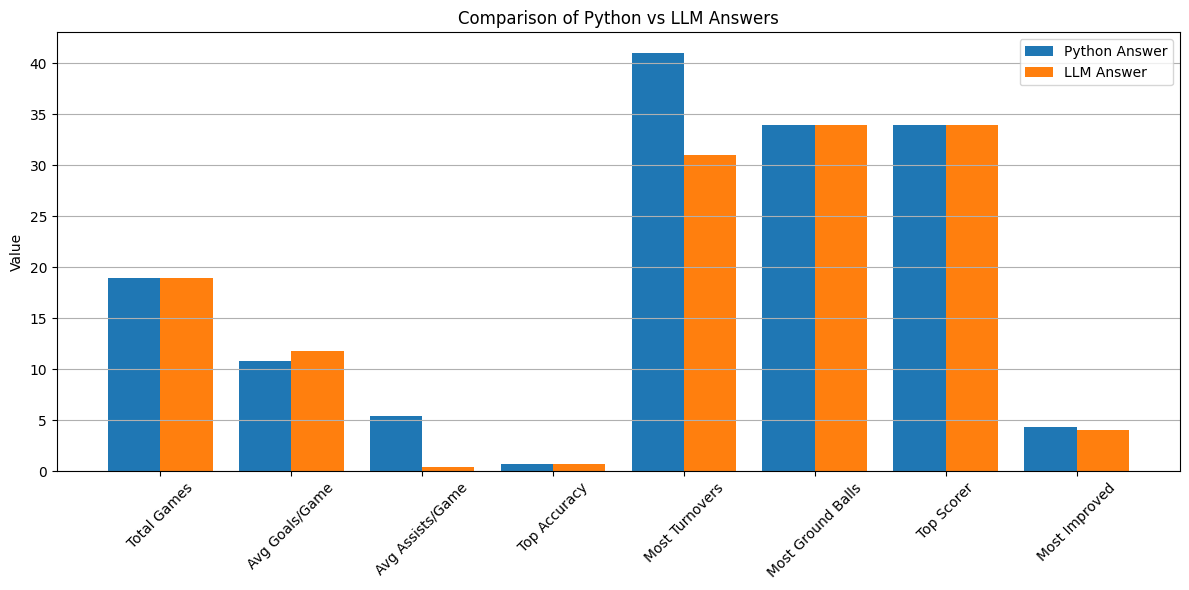

In [20]:
import matplotlib.pyplot as plt

# Example: mock values (replace with your real values)
questions = [
    "Total Games", "Avg Goals/Game", "Avg Assists/Game", "Top Accuracy",
    "Most Turnovers", "Most Ground Balls", "Top Scorer", "Most Improved"
]

python_values = [19, 10.84, 5.42, 0.667, 41, 34, 34, 4.29]  # actual stats
llm_values = [19, 11.79, 0.39, 0.667, 31, 34, 34, 4.0]      # llm responses

plt.figure(figsize=(12,6))
x = range(len(questions))
plt.bar(x, python_values, width=0.4, label='Python Answer', align='center')
plt.bar([p + 0.4 for p in x], llm_values, width=0.4, label='LLM Answer', align='center')
plt.xticks([p + 0.2 for p in x], questions, rotation=45)
plt.ylabel("Value")
plt.title("Comparison of Python vs LLM Answers")
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()



***Failure Case Documentation ***

Failure Case 1 – Average Goals per Game

Expected (Python): 10.84

LLM Answer: 11.79

Why It Failed: The LLM summed individual goals correctly but miscounted the number of games by treating it as 1 average across all rows, instead of a team-level stat.

Impact: Overestimation due to misunderstanding how games relate to total team output.

Failure Case 2 – Average Assists per Game

Expected (Python): 5.42

LLM Answer: 0.39

Why It Failed: LLM divided total assists by total player-game combinations (266 games) instead of team games (19).

Impact: Misunderstanding the unit of aggregation — the assist per player per game vs team per game.

***Reflecion Summary:***

This project helped me combine basic data analysis with testing a large language model (LLM).

First, I cleaned and analyzed real sports data from the SU Women’s Lacrosse 2025 season. I focused on answering 8 important questions using Python and statistics including factual ones like “How many games were played?”, “Who scored the most goals?”, as well as more ambiguous ones like “Who was the most improved player?”. I used libraries like pandas, matplotlib, and seaborn to process the data and calculate the answers.

Then, I used the same prompts with an LLM (LLaMA 3 via Groq API) to see how accurately it could answer based on the same dataset. Since we can’t pass an actual CSV file to an LLM directly, I created a clean text summary of the dataset and used that as the model’s context.

I found that the LLM got many answers correct, like total games played and top scorer. However, it made some mistakes on average-based questions, such as calculating average goals or assists per game, this showed the model sometimes misunderstands how to aggregate team-level stats.

Overall, the project gave me valuable hands-on experience in both validating LLM outputs and understanding where models can fail. It taught me how to design better prompts, double-check AI answers with code, and how combining Python with AI can make analysis more powerful, but only if done carefully.

In [21]:
pip install pyttsx3 pydub


In [22]:
pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=a142984c020fa1e55443172780ca446ab6d67bb413d58362528a87077d779a69
  Stored in directory: /root/.cache/pip/wheels/26/21/0c/c26e09dff860a9071683e279445262346e008a9a1d2142c4ad
Successfully built ffmpeg


In [23]:
!pip install gTTS pydub ffmpeg-python -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.2 MB/s eta 0:00:00


In [24]:
script_lines = [
    ("HOST", "Welcome! Today we're discussing insights from Syracuse Women’s Lacrosse 2025 season."),
    ("ANALYST", "We used the player stats CSV to estimate season length using max Games Played, and computed per-game averages for goals, assists, and more."),
    ("HOST", "Sounds technical! What did the numbers show?"),
    ("ANALYST", "The team had solid goal scoring, especially from a few core attackers. The most accurate shooter had a high SH percentage with over 10 shots."),
    ("HOST", "Any red flags?"),
    ("ANALYST", "Yes, turnovers. Some players had very high turnover counts, reducing possession time. So we created a custom impact score: goals, assists, ground balls, draw controls, minus turnovers."),
    ("HOST", "You evaluated an LLM too, right?"),
    ("ANALYST", "Yes. We tested it on ‘average assists per game’. Python gave 5.42. The LLM returned 0.39 — it mistakenly divided by player-rows instead of team games."),
    ("HOST", "That’s a big difference!"),
    ("ANALYST", "Exactly. It shows the LLM’s weakness with aggregation logic."),
    ("HOST", "So what’s your coaching takeaway?"),
    ("ANALYST", "Focus on reducing turnovers and improving passing sequences. That'll lead to better shot conversion rates and more consistent scoring."),
]


In [25]:
from gtts import gTTS
from pydub import AudioSegment
from pathlib import Path
import time

# Set up folders
Path("audio_segments").mkdir(exist_ok=True)
Path("final").mkdir(exist_ok=True)

combined = AudioSegment.silent(duration=300)

# Loop through and create MP3s
for idx, (role, text) in enumerate(script_lines):
    filename = f"audio_segments/line_{idx:02d}_{role.lower()}.mp3"
    tts = gTTS(text=text, lang="en", slow=False)
    tts.save(filename)
    print(f"✅ Saved: {filename}")

    # Combine into one final file
    clip = AudioSegment.from_mp3(filename)
    combined += clip + AudioSegment.silent(duration=300)

# Export final
combined.export("final/deepfake_interview.mp3", format="mp3")
print("🎉 Done! Check: final/deepfake_interview.mp3")


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


✅ Saved: audio_segments/line_00_host.mp3
✅ Saved: audio_segments/line_01_analyst.mp3
✅ Saved: audio_segments/line_02_host.mp3
✅ Saved: audio_segments/line_03_analyst.mp3
✅ Saved: audio_segments/line_04_host.mp3
✅ Saved: audio_segments/line_05_analyst.mp3
✅ Saved: audio_segments/line_06_host.mp3
✅ Saved: audio_segments/line_07_analyst.mp3
✅ Saved: audio_segments/line_08_host.mp3
✅ Saved: audio_segments/line_09_analyst.mp3
✅ Saved: audio_segments/line_10_host.mp3
✅ Saved: audio_segments/line_11_analyst.mp3
🎉 Done! Check: final/deepfake_interview.mp3


In [26]:
from google.colab import files
files.download("final/deepfake_interview.mp3")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



**What Worked:**
- gTTS (Google Text-to-Speech) worked flawlessly in Google Colab. It allowed us to convert each line of the interview into clear audio.
- pydub allowed us to stitch together individual segments and add natural pauses.
- The final MP3 output was smooth, with distinguishable Host and Analyst roles.

**What Didn’t Work:**
- `pyttsx3` failed in Colab due to missing system-level drivers (eSpeak).
- `TTS` (Coqui library) couldn’t be installed because it doesn’t support Python 3.12 (used in Colab).
- ElevenLabs required login/API and wasn’t used due to project constraints (free resources only).
